In [439]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [440]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

# EDA

In [441]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [442]:
df.shape

(1000, 40)

In [443]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# Handling Null values

In [444]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [445]:
df=df.drop('_c39',axis=1)

In [446]:
df.shape

(1000, 39)

In [447]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [448]:
df['police_report_available'].nunique()

3

In [449]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [450]:
df.loc[df.police_report_available=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N
10,235,42,543610,26-05-2002,OH,100/300,500,1253.12,4000000,462283,...,2,?,87010,7910,15820,63280,Ford,F150,2002,N
20,460,62,183430,25-06-2002,IN,250/500,1000,1187.96,4000000,618845,...,0,?,47160,0,5240,41920,Suburu,Impreza,2011,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,550127,04-07-2007,IN,250/500,1000,1248.05,0,443550,...,2,?,53280,5920,0,47360,Chevrolet,Malibu,2015,N
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N


In [451]:
df.drop(df[df['police_report_available'] == '?'].index,inplace=True)

In [452]:
df['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [453]:
df['police_report_available'].nunique()

2

In [454]:
df.shape

(657, 39)

In [455]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [456]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,257,44,109392,12-07-2006,OH,100/300,1000,1280.88,0,433981,...,1,NO,46980,0,5220,41760,Accura,TL,2002,N
992,94,26,215278,24-10-2007,IN,100/300,500,722.66,0,433696,...,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           657 non-null    int64  
 1   age                          657 non-null    int64  
 2   policy_number                657 non-null    int64  
 3   policy_bind_date             657 non-null    object 
 4   policy_state                 657 non-null    object 
 5   policy_csl                   657 non-null    object 
 6   policy_deductable            657 non-null    int64  
 7   policy_annual_premium        657 non-null    float64
 8   umbrella_limit               657 non-null    int64  
 9   insured_zip                  657 non-null    int64  
 10  insured_sex                  657 non-null    object 
 11  insured_education_level      657 non-null    object 
 12  insured_occupation           657 non-null    object 
 13  insured_hobbies     

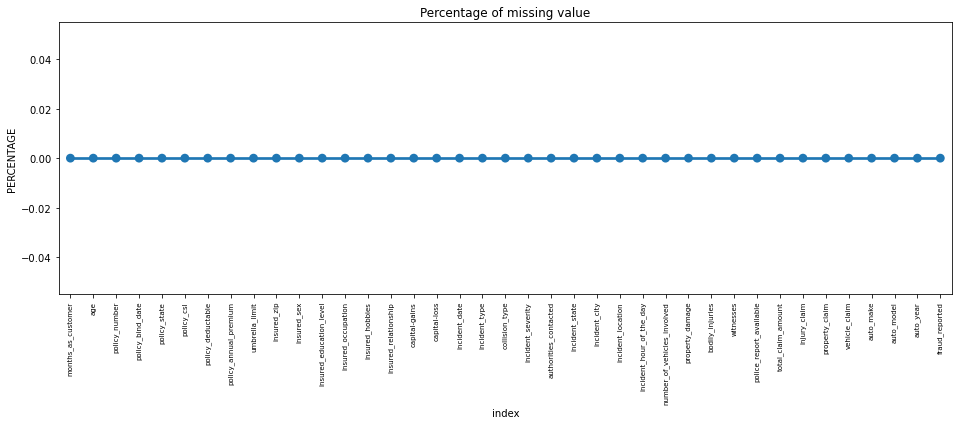

In [458]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()

plt.figure(figsize=(16,5))

ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)

plt.ylabel('PERCENTAGE')
plt.title('Percentage of missing value')

plt.show()

Now we can see there are no null values

In [459]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [460]:
df['fraud_reported'].nunique()

2

In [461]:
df['fraud_reported'].value_counts()

N    499
Y    158
Name: fraud_reported, dtype: int64

In [462]:
100*df['fraud_reported'].value_counts()/len(df['fraud_reported'])

N    75.951294
Y    24.048706
Name: fraud_reported, dtype: float64

Data is highly imblance,ratio = 75:24

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

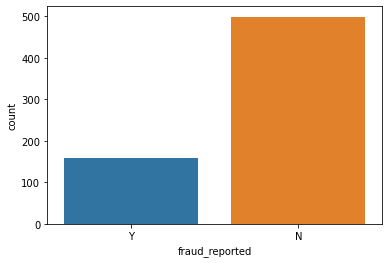

In [463]:
sns.countplot(df['fraud_reported'])

In [464]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,657.000000,657.000000,657.000000,657.000000,657.000000,6.570000e+02,657.000000,657.00000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,208.257230,39.245053,550720.764079,1142.313546,1256.713029,1.015221e+06,499160.560122,24960.42618,-26957.382040,11.794521,1.826484,0.998478,1.512938,51892.085236,7250.289193,7299.634703,37342.161339,2005.094368
std,112.904135,9.122268,261142.767513,614.166701,246.069840,2.196119e+06,71304.270395,27996.20758,28151.528321,6.891721,1.025750,0.810561,1.103031,26567.168265,4828.181127,4821.005410,19025.127020,6.001035
min,0.000000,20.000000,100804.000000,500.000000,433.330000,0.000000e+00,430104.000000,0.00000,-93600.000000,0.000000,1.000000,0.000000,0.000000,1920.000000,0.000000,0.000000,1440.000000,1995.000000
25%,122.000000,32.000000,335780.000000,500.000000,1090.650000,0.000000e+00,446326.000000,0.00000,-51800.000000,6.000000,1.000000,0.000000,1.000000,39720.000000,4060.000000,4290.000000,28560.000000,2000.000000
50%,200.000000,39.000000,540152.000000,1000.000000,1257.830000,0.000000e+00,465674.000000,0.00000,-26900.000000,12.000000,1.000000,1.000000,2.000000,57200.000000,6620.000000,6630.000000,41760.000000,2005.000000
75%,282.000000,45.000000,774303.000000,2000.000000,1422.780000,0.000000e+00,602258.000000,51400.00000,0.000000,18.000000,3.000000,2.000000,2.000000,70290.000000,10800.000000,10900.000000,50800.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,98800.00000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21330.000000,23670.000000,79560.000000,2015.000000


In [465]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.937324,0.054803,0.054628,0.015925,-0.013437,-0.011819,0.031616,0.036549,0.059486,0.020275,-0.017352,0.067143,0.076141,0.084445,0.055083,0.070937,-0.027471
age,0.937324,1.000000,0.072541,0.060019,0.027102,-0.021797,-0.015498,0.005124,0.029000,0.076212,0.026870,-0.022421,0.056723,0.076488,0.087802,0.061996,0.068818,-0.032001
policy_number,0.054803,0.072541,1.000000,-0.012134,0.017662,-0.004105,-0.002566,0.024433,-0.050643,-0.014806,-0.012979,-0.007545,0.003089,0.000318,-0.014876,0.028375,-0.002971,-0.002327
policy_deductable,0.054628,0.060019,-0.012134,1.000000,-0.022840,-0.028168,-0.021265,0.057290,-0.048870,0.067424,0.068294,-0.024061,0.057471,0.042309,0.055270,0.076139,0.025761,0.067077
policy_annual_premium,0.015925,0.027102,0.017662,-0.022840,1.000000,-0.006367,0.058757,-0.003174,0.020476,0.037017,-0.034156,0.061753,0.001572,0.016891,-0.013994,-0.006397,0.028760,-0.014657
umbrella_limit,-0.013437,-0.021797,-0.004105,-0.028168,-0.006367,1.000000,0.008602,-0.054631,-0.038160,-0.029707,-0.015067,0.047969,0.015651,-0.074501,-0.043587,-0.061688,-0.077342,-0.032034
insured_zip,-0.011819,-0.015498,-0.002566,-0.021265,0.058757,0.008602,1.000000,-0.021639,0.034136,0.057343,-0.016405,0.031549,0.020005,-0.026426,-0.026239,-0.025455,-0.023793,-0.069335
capital-gains,0.031616,0.005124,0.024433,0.057290,-0.003174,-0.054631,-0.021639,1.000000,-0.076114,-0.009103,0.027369,0.029770,-0.007462,-0.000388,0.003405,-0.014109,0.002170,0.017556
capital-loss,0.036549,0.029000,-0.050643,-0.048870,0.020476,-0.038160,0.034136,-0.076114,1.000000,-0.021630,-0.055495,-0.033159,-0.011348,-0.005312,-0.009945,0.001490,-0.005271,-0.030606
incident_hour_of_the_day,0.059486,0.076212,-0.014806,0.067424,0.037017,-0.029707,0.057343,-0.009103,-0.021630,1.000000,0.114628,-0.035258,-0.002959,0.202453,0.150181,0.137618,0.209724,0.005335


<AxesSubplot:>

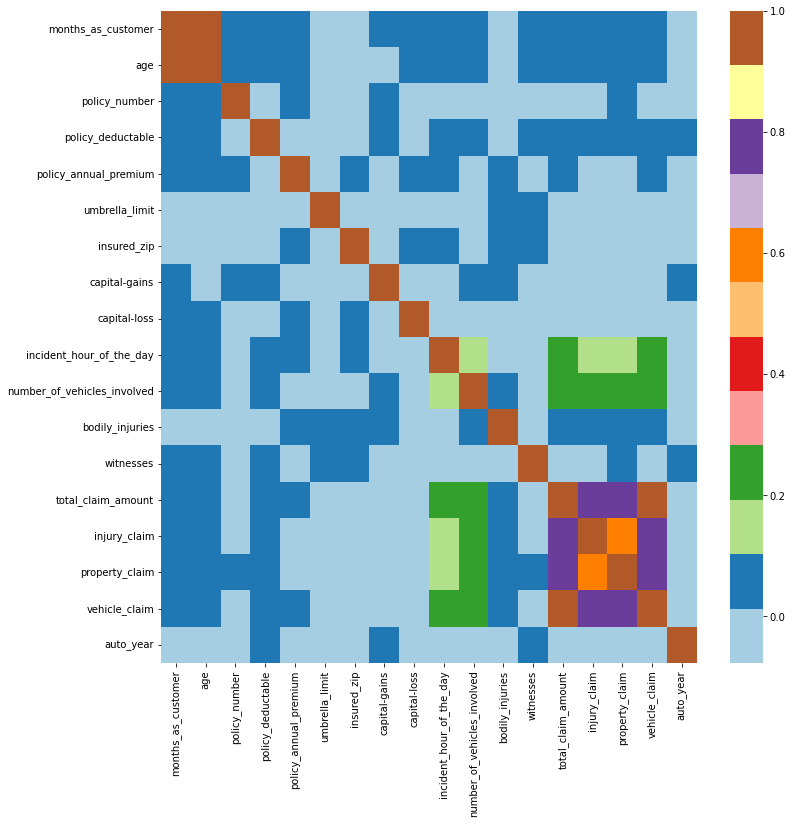

In [466]:
plt.figure(figsize=(12,12))


sns.heatmap(df.corr(),cmap='Paired')

# Encording the data

In [467]:
from sklearn.preprocessing import LabelEncoder


In [468]:
le=LabelEncoder()

# Change data string to datetime

In [469]:
df['policy_bind_date'].dtypes

dtype('O')

In [470]:
df['policy_bind_date'] = df['policy_bind_date'].astype('datetime64[ns]')


In [471]:
df['policy_bind_date'].dtypes

dtype('<M8[ns]')

In [472]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,2006-12-10,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,257,44,109392,2006-12-07,OH,100/300,1000,1280.88,0,433981,...,1,NO,46980,0,5220,41760,Accura,TL,2002,N
992,94,26,215278,2007-10-24,IN,100/300,500,722.66,0,433696,...,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N
994,141,30,681486,2007-03-24,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N


# Seprating the Numerical Features and categorical feature

In [482]:
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))
     

Numerical Features Count 19
Categorical feature Count 20


In [483]:
print(categorical_feature)

['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [484]:
print(numerical_feature)

['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [485]:
for column in categorical_feature:
    df.loc[:,column] = le.fit_transform(df.loc[:,column]) 

In [486]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
2,134,29,687698,2000-06-09,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0
5,256,39,104594,2006-12-10,2,1,1000,1351.10,0,478456,...,2,0,64100,6410,6410,51280,10,3,2003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,257,44,109392,2006-12-07,2,0,1000,1280.88,0,433981,...,1,0,46980,0,5220,41760,0,33,2002,0
992,94,26,215278,2007-10-24,1,0,500,722.66,0,433696,...,2,1,36700,3670,7340,25690,9,29,2010,0
994,141,30,681486,2007-03-24,1,2,1000,1347.04,0,430665,...,2,1,6480,540,1080,4860,6,10,1996,0
997,130,34,918516,2003-02-17,2,1,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,11,19,1996,0


# Check skewness

In [511]:
z=df.skew().sort_values

z

<bound method Series.sort_values of months_as_customer             0.386489
age                            0.470058
policy_number                  0.015967
policy_state                  -0.088976
policy_csl                     0.080986
policy_deductable              0.459296
policy_annual_premium         -0.062613
umbrella_limit                 1.893094
insured_zip                    0.859933
insured_sex                    0.106941
insured_education_level        0.001913
insured_occupation            -0.075131
insured_hobbies               -0.032711
insured_relationship           0.107125
capital-gains                  0.483728
capital-loss                  -0.347583
incident_type                  0.074803
collision_type                -0.184958
incident_severity              0.248709
authorities_contacted         -0.122823
incident_state                -0.125723
incident_city                  0.048994
incident_location              0.000000
incident_hour_of_the_day      -0.047632
numb

In [502]:
df['incident_date'].dtypes

dtype('int32')

In [503]:
df['incident_date'] = df['incident_date'].astype('datetime64[ns]')


In [518]:
df['incident_date'].dtypes

dtype('<M8[ns]')

In [519]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
2,134,29,687698,2000-06-09,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0
5,256,39,104594,2006-12-10,2,1,1000,1351.10,0,478456,...,2,0,64100,6410,6410,51280,10,3,2003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,257,44,109392,2006-12-07,2,0,1000,1280.88,0,433981,...,1,0,46980,0,5220,41760,0,33,2002,0
992,94,26,215278,2007-10-24,1,0,500,722.66,0,433696,...,2,1,36700,3670,7340,25690,9,29,2010,0
994,141,30,681486,2007-03-24,1,2,1000,1347.04,0,430665,...,2,1,6480,540,1080,4860,6,10,1996,0
997,130,34,918516,2003-02-17,2,1,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,11,19,1996,0


In [525]:
df_new =df.drop(['policy_bind_date','incident_date'], axis=1)

In [527]:
df_new.shape

(657, 37)

In [528]:
df_new.skew()

months_as_customer             0.386489
age                            0.470058
policy_number                  0.015967
policy_state                  -0.088976
policy_csl                     0.080986
policy_deductable              0.459296
policy_annual_premium         -0.062613
umbrella_limit                 1.893094
insured_zip                    0.859933
insured_sex                    0.106941
insured_education_level        0.001913
insured_occupation            -0.075131
insured_hobbies               -0.032711
insured_relationship           0.107125
capital-gains                  0.483728
capital-loss                  -0.347583
incident_type                  0.074803
collision_type                -0.184958
incident_severity              0.248709
authorities_contacted         -0.122823
incident_state                -0.125723
incident_city                  0.048994
incident_location              0.000000
incident_hour_of_the_day      -0.047632
number_of_vehicles_involved    0.547895


In [530]:
# detecting outliers

from scipy.stats import zscore

dfzscore = np.abs(zscore(df_new))

print(np.where(dfzscore>3))

(array([ 31,  59, 149, 164, 280, 324, 432, 506, 579, 609], dtype=int64), array([ 7,  7,  6,  6,  7, 31,  7,  6,  7,  7], dtype=int64))


In [531]:
dfnew = df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',df_new.shape)

df=dfnew

dfnew.shape= (657, 37)


In [532]:
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.939193,0.056046,-0.009582,-0.032133,0.050498,0.002929,-0.004564,-0.003185,0.036815,...,0.076140,-0.066043,0.071125,0.080262,0.059218,0.063909,0.046880,-0.018537,-0.029974,0.032322
age,0.939193,1.000000,0.072641,-0.021053,-0.024077,0.054487,0.014340,-0.022582,-0.009443,0.051813,...,0.063035,-0.060735,0.073190,0.085992,0.064983,0.063877,0.038068,-0.007623,-0.031303,0.014684
policy_number,0.056046,0.072641,1.000000,0.093974,0.023012,-0.015703,0.028093,-0.006689,-0.001082,0.028510,...,0.013640,0.016325,0.003824,-0.012083,0.030866,0.000625,0.035094,0.070320,-0.003153,-0.010270
policy_state,-0.009582,-0.021053,0.093974,1.000000,-0.002472,0.003905,-0.015925,0.002471,0.041108,0.014509,...,0.045223,0.051114,-0.020359,-0.058757,0.009167,-0.015776,0.036125,-0.011489,-0.034007,0.057949
policy_csl,-0.032133,-0.024077,0.023012,-0.002472,1.000000,-0.007802,0.025388,0.006856,-0.014175,0.045630,...,0.081296,-0.012907,-0.005508,-0.059391,0.012315,0.004320,0.013011,0.016047,0.006601,0.010968
policy_deductable,0.050498,0.054487,-0.015703,0.003905,-0.007802,1.000000,-0.031444,-0.035507,-0.021097,0.003196,...,0.066359,0.039512,0.045570,0.060131,0.084834,0.026899,-0.037445,0.009409,0.071259,0.050690
policy_annual_premium,0.002929,0.014340,0.028093,-0.015925,0.025388,-0.031444,1.000000,-0.010394,0.082169,0.022144,...,0.006486,0.040302,0.007950,-0.024717,-0.001033,0.017647,0.028511,-0.035442,-0.001987,0.017052
umbrella_limit,-0.004564,-0.022582,-0.006689,0.002471,0.006856,-0.035507,-0.010394,1.000000,-0.016278,0.065712,...,0.009497,-0.033776,-0.052981,-0.024152,-0.034311,-0.059147,0.010154,0.035098,-0.013027,0.018559
insured_zip,-0.003185,-0.009443,-0.001082,0.041108,-0.014175,-0.021097,0.082169,-0.016278,1.000000,-0.003973,...,0.010462,0.038434,-0.027428,-0.025109,-0.031019,-0.024068,-0.001795,0.004485,-0.077925,-0.024062
insured_sex,0.036815,0.051813,0.028510,0.014509,0.045630,0.003196,0.022144,0.065712,-0.003973,1.000000,...,0.058462,0.002356,-0.029804,-0.036208,-0.022326,-0.026753,0.032115,-0.011663,-0.053439,0.010536


In [535]:
df_new.skew()

months_as_customer             0.386489
age                            0.470058
policy_number                  0.015967
policy_state                  -0.088976
policy_csl                     0.080986
policy_deductable              0.459296
policy_annual_premium         -0.062613
umbrella_limit                 1.893094
insured_zip                    0.859933
insured_sex                    0.106941
insured_education_level        0.001913
insured_occupation            -0.075131
insured_hobbies               -0.032711
insured_relationship           0.107125
capital-gains                  0.483728
capital-loss                  -0.347583
incident_type                  0.074803
collision_type                -0.184958
incident_severity              0.248709
authorities_contacted         -0.122823
incident_state                -0.125723
incident_city                  0.048994
incident_location              0.000000
incident_hour_of_the_day      -0.047632
number_of_vehicles_involved    0.547895


In [546]:
df_new.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

# Imblanced data handling

# Seprating the data into training and testing variable

In [561]:
x = df_new.drop(["fraud_reported"], axis=1)
y = df_new["fraud_reported"]

In [562]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

In [563]:
x_test.shape

(132, 36)

In [564]:
x_train.shape

(525, 36)

In [565]:
y_train.shape

(525,)

In [566]:
y_test.shape

(132,)

In [567]:
y.value_counts()

0    499
1    158
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

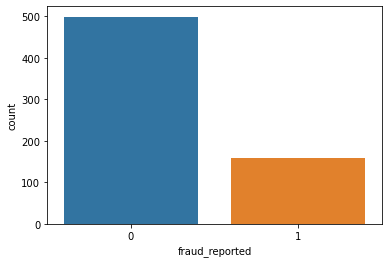

In [568]:
import seaborn as sns

sns.countplot(y)

In [569]:
from imblearn.over_sampling import SMOTE

In [570]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [571]:
y_train.value_counts()

1    499
0    499
Name: fraud_reported, dtype: int64

In [572]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model Building

In [573]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier 

print("Model is created")

Model is created


In [574]:
lr.fit(x_train, y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
adb.fit(x_train,y_train)
svm.fit(x_train,y_train)
gdboost.fit(x_train,y_train)
xgboost.fit(x_train,y_train)

print("Model is trained")

Model is trained


In [575]:
print("Lr classification score",lr.score(x_train,y_train))
print("knn classification score",knn.score(x_train,y_train))
print("dt classification score",dt.score(x_train,y_train))
print("rf classification score",rf.score(x_train,y_train))
print("adb classification score",adb.score(x_train,y_train))
print("svm classification score",svm.score(x_train,y_train))
print("gdboost classification score",gdboost.score(x_train,y_train))
print("xgboost classification score",xgboost.score(x_train,y_train))

Lr classification score 0.7695238095238095
knn classification score 0.8
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8876190476190476
svm classification score 0.7695238095238095
gdboost classification score 0.9885714285714285
xgboost classification score 1.0


In [576]:
lr_yprad = lr.predict(x_test)
knn_yprad = knn.predict(x_test)
dt_yprad = dt.predict(x_test)
rf_yprad = rf.predict(x_test)
adb_yprad = adb.predict(x_test)
svm_yprad = svm.predict(x_test)
gdboost_yprad = gdboost.predict(x_test)
xgboost_yprad = xgboost.predict(x_test)

In [577]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for gdboost_model",'\n',xgboost_conf_mat)


knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for gdboost_model",'\n',knn_conf_mat)

confusion matrix for lr_model 
 [[95  0]
 [37  0]]
confusion matrix for dt_model 
 [[82 13]
 [12 25]]
confusion matrix for lr_model 
 [[88  7]
 [25 12]]
confusion matrix for lr_model 
 [[86  9]
 [18 19]]
confusion matrix for svm_model 
 [[95  0]
 [37  0]]
confusion matrix for gdboost_model 
 [[84 11]
 [11 26]]
confusion matrix for gdboost_model 
 [[85 10]
 [11 26]]
confusion matrix for gdboost_model 
 [[88  7]
 [35  2]]


In [578]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)

xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)


 lr classification_report 
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        95
           1       0.00      0.00      0.00        37

    accuracy                           0.72       132
   macro avg       0.36      0.50      0.42       132
weighted avg       0.52      0.72      0.60       132

 knn classification_report 
               precision    recall  f1-score   support

           0       0.72      0.93      0.81        95
           1       0.22      0.05      0.09        37

    accuracy                           0.68       132
   macro avg       0.47      0.49      0.45       132
weighted avg       0.58      0.68      0.61       132

 dt classification_report 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87        95
           1       0.66      0.68      0.67        37

    accuracy                           0.81       132
   macro avg       0.77      0.77      0.77

# ROC AUC Curve:

In [579]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dt.predict(x_test)))
print(roc_auc_score(y_test,rf.predict(x_test)))
print(roc_auc_score(y_test,adb.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))
print(roc_auc_score(y_test,gdboost.predict(x_test)))
print(roc_auc_score(y_test,xgboost.predict(x_test)))


0.5
0.4901849217638691
0.769416785206259
0.6253200568990043
0.7093883357041252
0.5
0.793456614509246
0.798719772403983


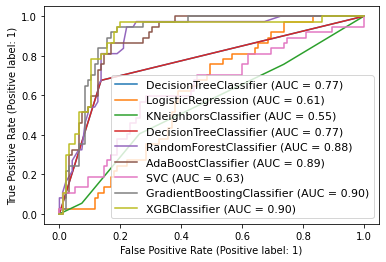

In [580]:
#lets find roc curve to check best fittted model

disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,x_test,y_test,ax=disp.ax_)

plt.legend(prop = {'size':11}, loc ='lower right')

As per above also we can see our GradientBoostClassifier and XGBClassifier hasd given the best scores.

# K-Fold Cross Validation :

In [581]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [582]:
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,x,y,cv=5).mean())
print("Mean of Cross validation score for xgboost model","=>",cross_val_score(xgboost,x,y,cv=5).mean())


Mean of Cross validation score for gdboost  model => 0.860062456627342
Mean of Cross validation score for xgboost model => 0.8432801295396717


As per above we can see our ‘xgboost’ model giving the less cross validation score. so we will consider this model is best for our prediction. Now will try hyperparameter tuning to check chances of accuracy increase

# HyperParameter Tuning

In [584]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [585]:
params_grid = {
    # Parameters that we are going to tune.
    'max_depth':range(6,7,8),
    'n_estimators':range(30,151,20),
    'eta':[.3],
    'subsample': [1],
    'colsample_bytree': [1],
}

In [586]:
# Instantiating XGBClassifier
xgb = XGBClassifier()


In [587]:
# Instantiating the GridSearchCV object
xgb_cv = GridSearchCV(xgb, params_grid, cv = 5,n_jobs=3,verbose=3)

In [588]:
xgb_cv.fit(x, y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'colsample_bytree': [1], 'eta': [0.3],
                         'max_depth': range(6, 7, 8),
                         'n_estimators': range(30, 151, 20), 'subsample': [1]},
             verbose=3)

In [589]:
# Print the tuned parameters and score
print("Tuned XGBClassifier Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

Tuned XGBClassifier Parameters: {'colsample_bytree': 1, 'eta': 0.3, 'max_depth': 6, 'n_estimators': 30, 'subsample': 1}
Best score is 0.8524288688410827


# Workflow¶

# Data Collection:

# Data Preprocessing:
Missing Values Handled by Random Sample imputation to maintain the variance

Categorical Values are handled by using label encoding

Outliers are handled using zscore
mbalanced Dataset was handled using SMOTE

Model Creation:
Different types of models were tried like GradientBoostingClassifier,Adaboost, random forest, logistic regression, xgboost, support vector machines, knn, naive bayes.

Out of these GradientBoostingClassifier,XGBClassifier are top 2

The conclusion were made using classification metrics. roc curve and auc score